In [2]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

In [3]:
nqubits = 4

H_def = sum([ -Z(x)*Z(x+1) + X(x)*X(x+1)+ Y(x)*Y(x+1)  for x in range(nqubits-1)])
#H_def = sum([ Z(x)*Z(x+1) +X(x) for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))

#H = np.kron(H,np.eye(2**5))
eigs,vecs = np.linalg.eigh(H)

[Qibo 0.2.16|INFO|2025-03-12 11:58:01]: Using numpy backend on /CPU:0
[Qibo 0.2.16|WARNING|2025-03-12 11:58:01]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


## ITE
$|\text{TFD}(\beta)\rangle = \frac{1}{\sqrt\mathcal{N}} e^{-\beta H/2} |\text{TFD}(0)\rangle$

In [ ]:
beta = np.logspace(-5, 2, 10)
tfd = np.zeros((len(beta), 2**(2*nqubits)), dtype=complex)
for i in range(len(beta)):
    tfd[i] = TFD(beta[i], H, maxEntangledState(nqubits))

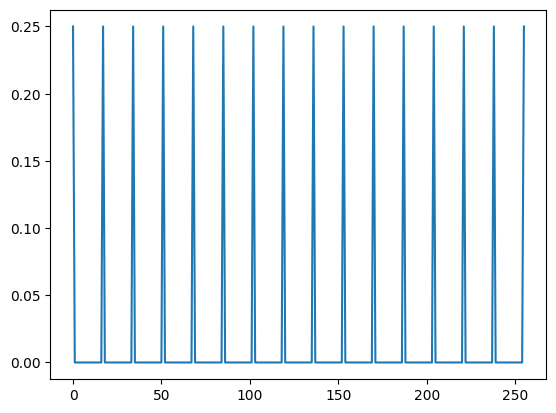

In [ ]:
plt.figure()
plt.plot(np.abs(maxEntangledState(nqubits)))
         

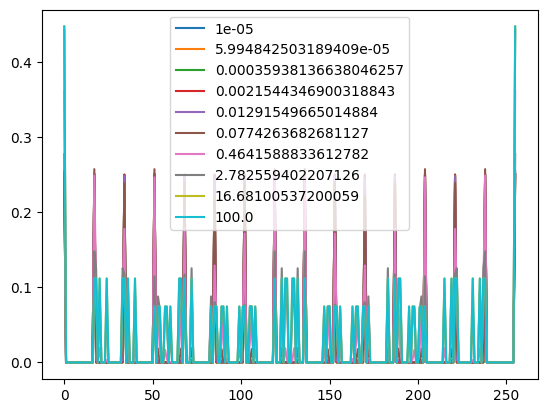

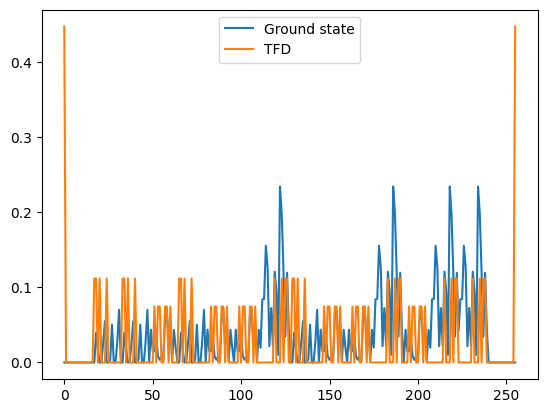

In [ ]:
plt.figure()
for i in range(len(beta)):
    plt.plot(np.abs(tfd[i,:]), label=str(beta[i]))
plt.legend()

plt.figure()
plt.plot(np.abs(vecs.T[0]),label='Ground state')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()
plt.show()


## Exact Commutator

$|\sigma_{k+1} \rangle = e^{-s_k [\sigma_k, H]}|\sigma_k \rangle$

c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity[0] = UJFidelity(refState, initState)
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  steps[i] = s
c:\Users\andre\Desktop\EPFL\Master-Project\Master-Project\functions.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity[i+1] = UJFidelity(refState, state)


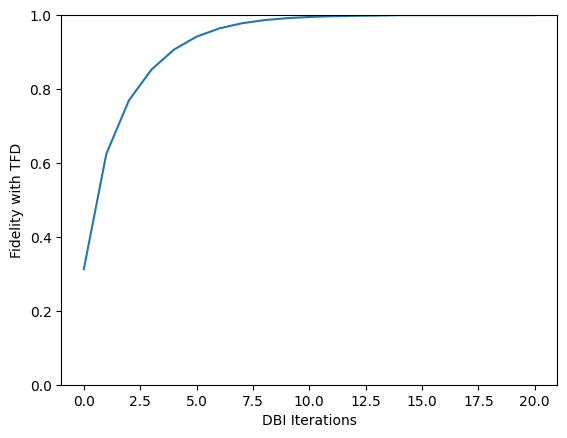

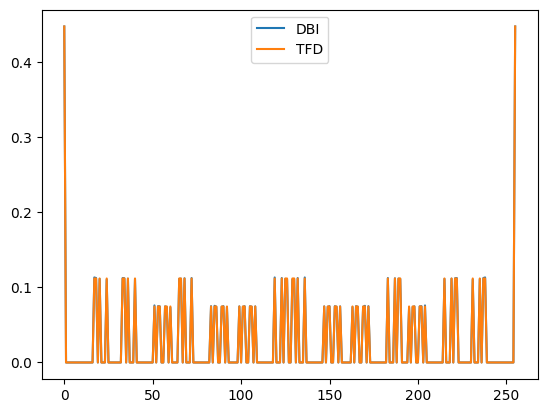

In [ ]:
state = maxEntangledState(nqubits)
fidelity, state, steps = optimalDBI(H,state, tfd[-1,:])
iters = 20

plt.figure()
plt.plot(fidelity)
plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.show()


plt.figure()
plt.plot(np.abs(state),label='DBI')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()
plt.show()



## Exact DB-QITE


$|\omega_{k+1} \rangle = e^{i\sqrt{s_k}H}e^{i\sqrt{s_k}\omega_k}e^{-i\sqrt{s_k}H}|\omega_k \rangle$

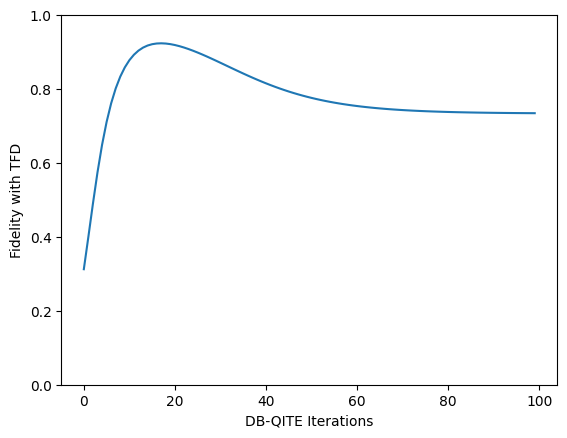

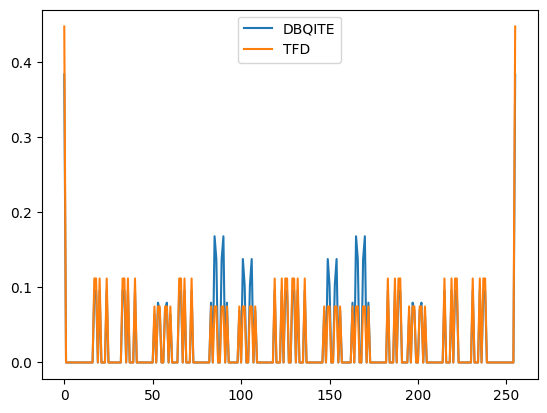

In [ ]:
state = maxEntangledState(nqubits)
step = 0.1
iters = 100

newState = DBQITE(iters, H, step, state)

fidelity = np.zeros(iters)
for i in range(iters):
    fidelity[i] = np.abs(UJFidelity(tfd[-1,:], newState[i,:]))

plt.figure()
plt.plot(fidelity)
plt.xlabel('DB-QITE Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)

plt.figure()
plt.plot(np.abs(newState[-1,:]),label='DBQITE')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()



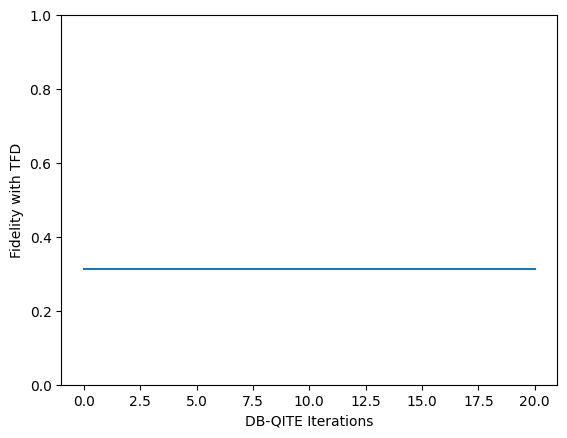

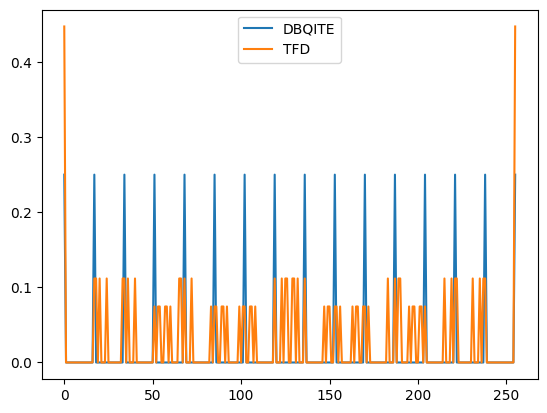

In [ ]:
state = maxEntangledState(nqubits)
fidelity, state, steps = optimalDBI(H, state, tfd[-1,:], "DBIQITE")

plt.figure()
plt.plot(fidelity)
plt.xlabel('DB-QITE Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.show()

plt.figure()
plt.plot(np.abs(state),label='DBQITE')
plt.plot(np.abs(tfd[-1,:]), label='TFD')
plt.legend()
plt.show()



## Comparison for different Hamiltonians and sizes

[Qibo 0.2.16|WARNING|2025-02-21 16:27:05]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[Qibo 0.2.16|WARNING|2025-02-21 16:27:05]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:27:08]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


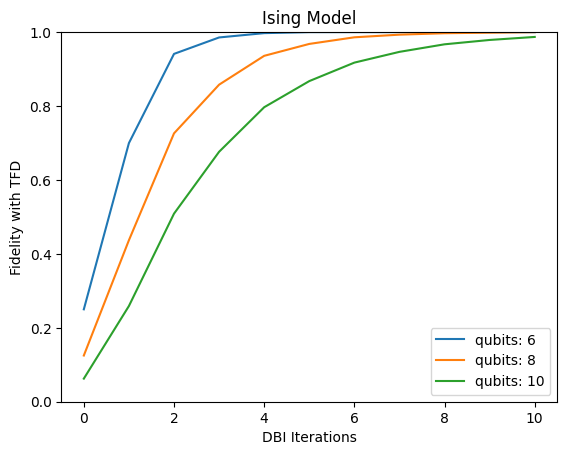

In [ ]:
nqubits =[3,4,5]
plt.figure()
plt.title('Ising Model')
for i in range(len(nqubits)):
    H_def = sum([ -Z(x)*Z(x+1) + X(x)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(100, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-02-21 16:28:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:28:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:28:13]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


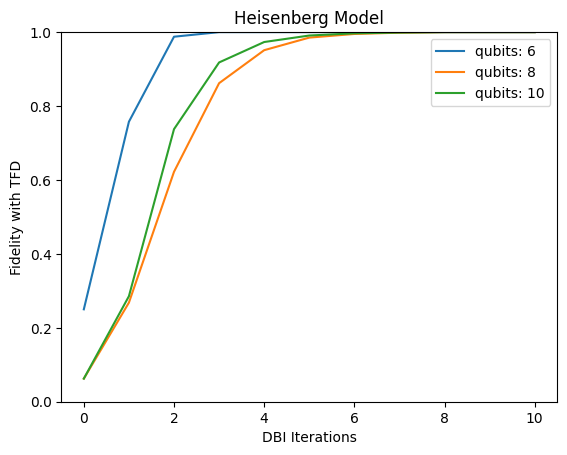

In [ ]:
nqubits = [3, 4, 5]
plt.figure()
plt.title('Heisenberg Model')
for i in range(len(nqubits)):
    H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(10, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-02-21 16:28:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[Qibo 0.2.16|WARNING|2025-02-21 16:28:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:28:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:28:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


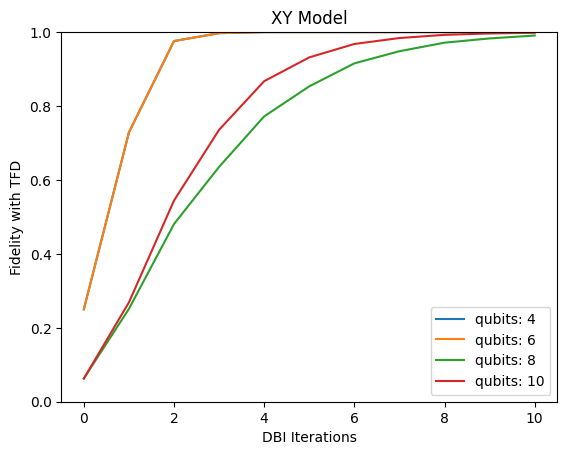

In [ ]:
nqubits = [2, 3, 4, 5]
plt.figure()
plt.title('XY Model')
for i in range(len(nqubits)):
    H_def = sum([X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(10, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-02-21 16:29:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:29:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:29:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-02-21 16:29:39]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


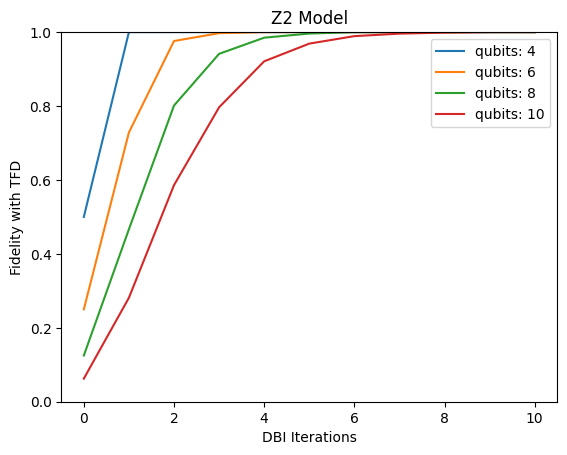

In [ ]:
nqubits = [2, 3, 4, 5]
plt.figure()
plt.title('Z2 Model')
for i in range(len(nqubits)):
    H_def = sum([-Z(x)*Z(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = np.kron(H,np.eye(2**nqubits[i]))
    initState = maxEntangledState(nqubits[i])
    refState = TFD(10, H, initState)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    #fFidelity, state, stepsFidelity = optimalDBI(H, initState, refState, "DBI", "Fidelity")

    plt.plot(fEnergy, label = "qubits: " + str(2*nqubits[i]))
    #plt.plot(fFidelity, label='Fidelity '+str(nqubits[i]))

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-02-24 09:39:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


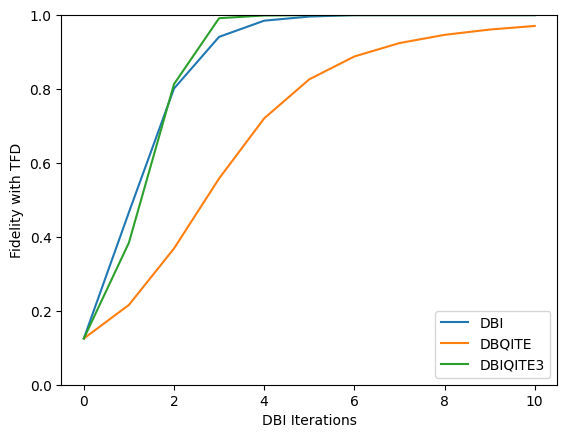

In [ ]:
nqubits = 4
H_def = sum([-Z(x)*Z(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
initState = maxEntangledState(nqubits)
refState = TFD(10, H, initState)
    
fDBI, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
fDBQITE, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE", "Energy", 10)
fDBQITE3, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE_thirdOrder", "Energy", 10)

plt.figure()
plt.title('Z2 Model')
plt.plot(fDBI, label='DBI')
plt.plot(fDBQITE, label='DBQITE')
plt.plot(fDBQITE3, label='DBIQITE3')
plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()

[Qibo 0.2.16|WARNING|2025-02-24 09:40:31]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


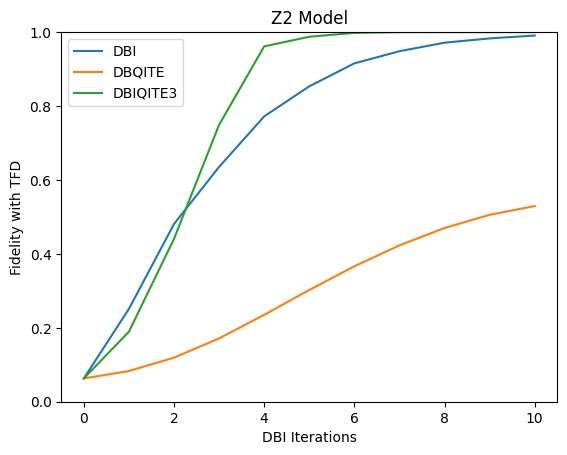

In [ ]:
nqubits = 4
H_def = sum([X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
initState = maxEntangledState(nqubits)
refState = TFD(10, H, initState)
    
fDBI, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
fDBQITE, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE", "Energy", 10)
fDBQITE3, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE_thirdOrder", "Energy", 10)

plt.figure()
plt.title('XY Model')
plt.plot(fDBI, label='DBI')
plt.plot(fDBQITE, label='DBQITE')
plt.plot(fDBQITE3, label='DBIQITE3')
plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()

[Qibo 0.2.16|WARNING|2025-02-24 09:42:46]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


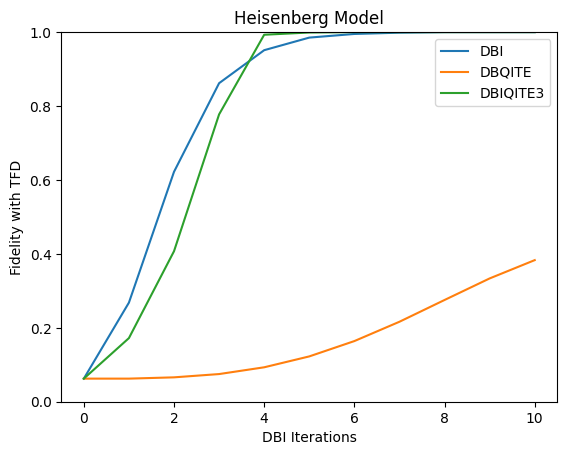

In [ ]:
nqubits = 4
H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
initState = maxEntangledState(nqubits)
refState = TFD(10, H, initState)
    
fDBI, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
fDBQITE, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE", "Energy", 10)
fDBQITE3, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE_thirdOrder", "Energy", 10)

plt.figure()
plt.title('Heisenberg Model')
plt.plot(fDBI, label='DBI')
plt.plot(fDBQITE, label='DBQITE')
plt.plot(fDBQITE3, label='DBIQITE3')
plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()

[Qibo 0.2.16|WARNING|2025-02-24 09:42:50]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


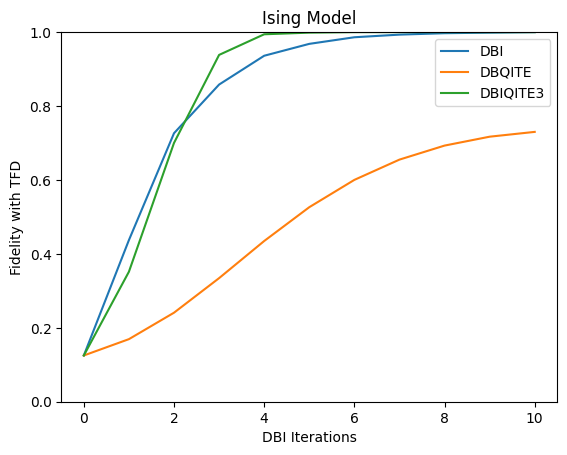

In [ ]:
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
initState = maxEntangledState(nqubits)
refState = TFD(10, H, initState)
    
fDBI, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
fDBQITE, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE", "Energy", 10)
fDBQITE3, state, stepsEnergy = optimalDBI(H, initState, refState, "DBQITE_thirdOrder", "Energy", 10)

plt.figure()
plt.title('Ising Model')
plt.plot(fDBI, label='DBI')
plt.plot(fDBQITE, label='DBQITE')
plt.plot(fDBQITE3, label='DBIQITE3')
plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.ylim(0,1)
plt.legend()


[Qibo 0.2.16|WARNING|2025-02-24 10:10:13]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


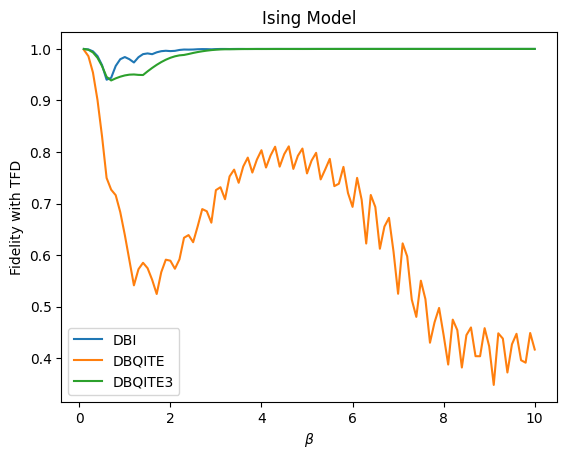

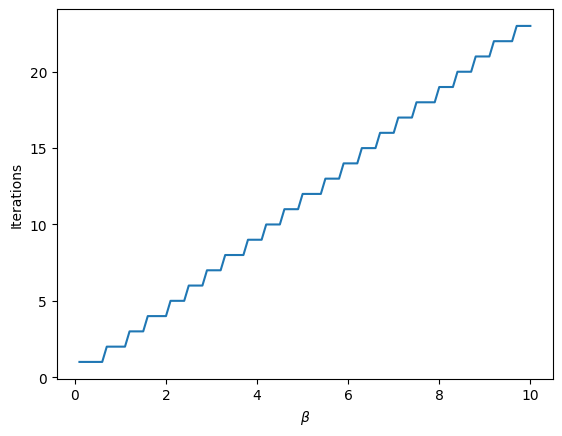

In [ ]:
beta = np.linspace(0.1, 10, 100)
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelityDBI = np.empty(len(beta))
itersDBI = np.empty(len(beta))
fidelityDBQITE = np.empty(len(beta))
itersDBQITE = np.empty(len(beta))
fidelityDBQITE3 = np.empty(len(beta))
itersDBQITE3 = np.empty(len(beta))
for i in range(len(beta)):
    fidelityDBI[i], itersDBI[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBI", "Energy")
    fidelityDBQITE[i], itersDBQITE[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE", "Energy")
    fidelityDBQITE3[i], itersDBQITE3[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE_thirdOrder", "Energy")


plt.figure()
plt.title("Ising Model")
plt.plot(beta, fidelityDBI, label ='DBI')
plt.plot(beta, fidelityDBQITE, label ='DBQITE')
plt.plot(beta, fidelityDBQITE3, label ='DBQITE3')
plt.xlabel(r'$\beta$')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()

plt.figure()
plt.plot(beta, itersDBI)
plt.xlabel(r'$\beta$')
plt.ylabel('Iterations')
plt.show()

[Qibo 0.2.16|WARNING|2025-02-24 10:15:04]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


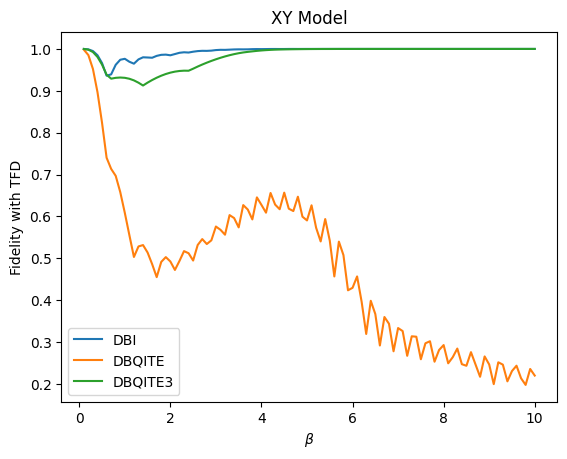

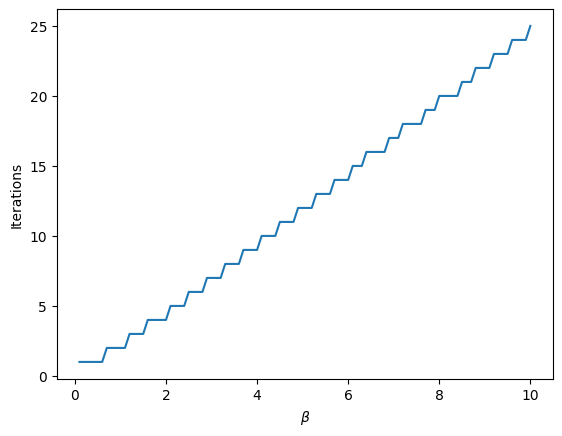

In [ ]:
beta = np.linspace(0.1, 10, 100)
nqubits = 4
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelityDBI = np.empty(len(beta))
itersDBI = np.empty(len(beta))
fidelityDBQITE = np.empty(len(beta))
itersDBQITE = np.empty(len(beta))
fidelityDBQITE3 = np.empty(len(beta))
itersDBQITE3 = np.empty(len(beta))
for i in range(len(beta)):
    fidelityDBI[i], itersDBI[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBI", "Energy")
    fidelityDBQITE[i], itersDBQITE[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE", "Energy")
    fidelityDBQITE3[i], itersDBQITE3[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE_thirdOrder", "Energy")


plt.figure()
plt.title("XY Model")
plt.plot(beta, fidelityDBI, label ='DBI')
plt.plot(beta, fidelityDBQITE, label ='DBQITE')
plt.plot(beta, fidelityDBQITE3, label ='DBQITE3')
plt.xlabel(r'$\beta$')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()

plt.figure()
plt.plot(beta, itersDBI)
plt.xlabel(r'$\beta$')
plt.ylabel('Iterations')
plt.show()

[Qibo 0.2.16|WARNING|2025-02-24 10:18:52]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


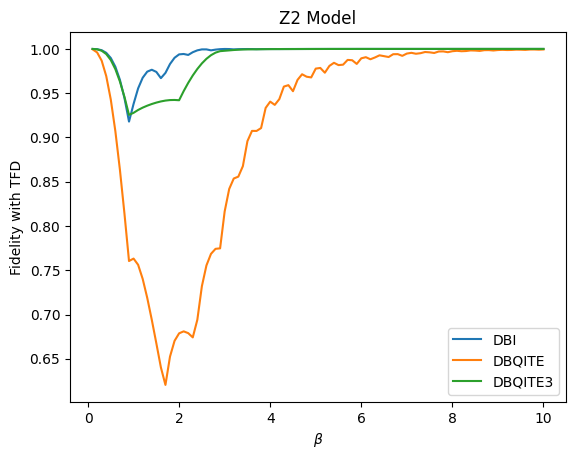

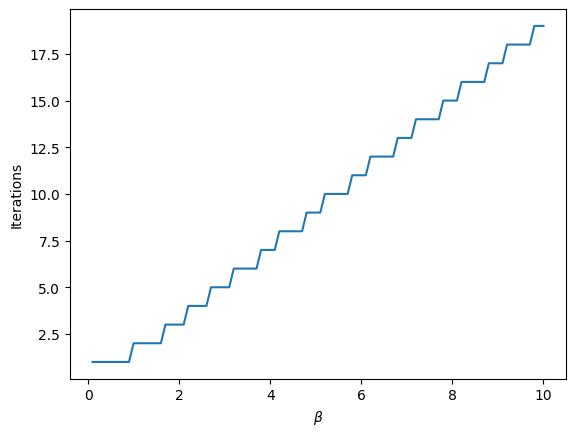

In [ ]:
beta = np.linspace(0.1, 10, 100)
nqubits = 4
H_def = sum([Z(x)*Z(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelityDBI = np.empty(len(beta))
itersDBI = np.empty(len(beta))
fidelityDBQITE = np.empty(len(beta))
itersDBQITE = np.empty(len(beta))
fidelityDBQITE3 = np.empty(len(beta))
itersDBQITE3 = np.empty(len(beta))
for i in range(len(beta)):
    fidelityDBI[i], itersDBI[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBI", "Energy")
    fidelityDBQITE[i], itersDBQITE[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE", "Energy")
    fidelityDBQITE3[i], itersDBQITE3[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE_thirdOrder", "Energy")


plt.figure()
plt.title("Z2 Model")
plt.plot(beta, fidelityDBI, label ='DBI')
plt.plot(beta, fidelityDBQITE, label ='DBQITE')
plt.plot(beta, fidelityDBQITE3, label ='DBQITE3')
plt.xlabel(r'$\beta$')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()

plt.figure()
plt.plot(beta, itersDBI)
plt.xlabel(r'$\beta$')
plt.ylabel('Iterations')
plt.show()

[Qibo 0.2.16|WARNING|2025-02-24 10:21:31]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


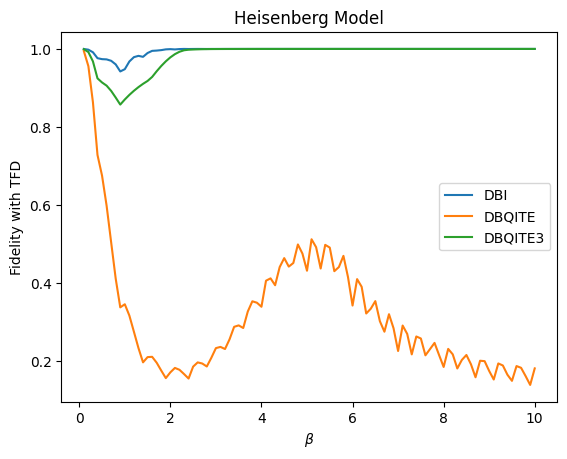

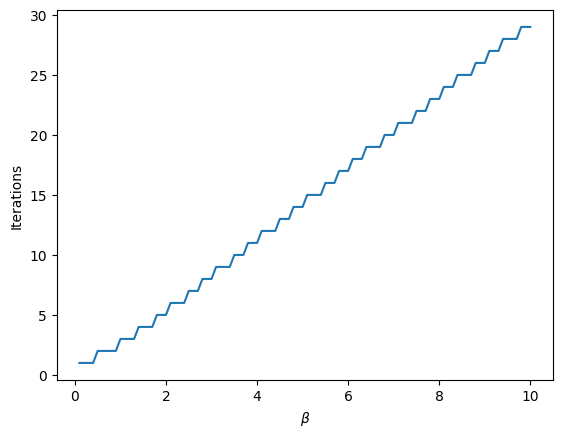

In [ ]:
beta = np.linspace(0.1, 10, 100)
nqubits = 4
H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelityDBI = np.empty(len(beta))
itersDBI = np.empty(len(beta))
fidelityDBQITE = np.empty(len(beta))
itersDBQITE = np.empty(len(beta))
fidelityDBQITE3 = np.empty(len(beta))
itersDBQITE3 = np.empty(len(beta))
for i in range(len(beta)):
    fidelityDBI[i], itersDBI[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBI", "Energy")
    fidelityDBQITE[i], itersDBQITE[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE", "Energy")
    fidelityDBQITE3[i], itersDBQITE3[i] = thermalStatePrepOptimal(beta[i],H, nqubits, "DBQITE_thirdOrder", "Energy")


plt.figure()
plt.title('Heisenberg Model')
plt.plot(beta, fidelityDBI, label ='DBI')
plt.plot(beta, fidelityDBQITE, label ='DBQITE')
plt.plot(beta, fidelityDBQITE3, label ='DBQITE3')
plt.xlabel(r'$\beta$')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()

plt.figure()
plt.plot(beta, itersDBI)
plt.xlabel(r'$\beta$')
plt.ylabel('Iterations')
plt.show()

[Qibo 0.2.16|WARNING|2025-02-24 13:21:27]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


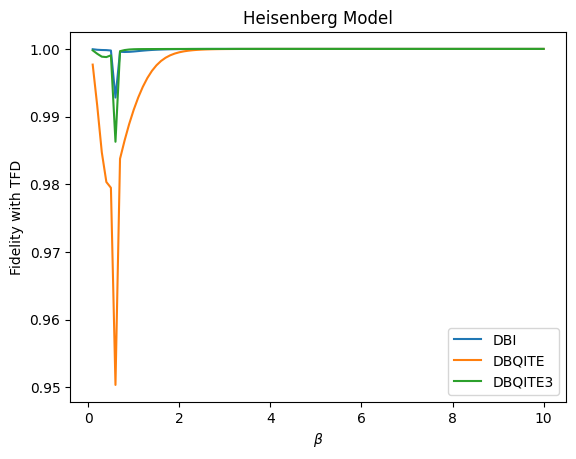

In [ ]:
beta = np.linspace(0.1, 10, 100)
nqubits = 3
H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelityDBI = np.empty(len(beta))
fidelityDBQITE = np.empty(len(beta))
fidelityDBQITE3 = np.empty(len(beta))

for i in range(len(beta)):
    fidelityDBI[i]  = thermalStatePrepComparison(beta[i], H, nqubits, "DBI", 0.05)
    fidelityDBQITE[i] = thermalStatePrepComparison(beta[i], H, nqubits, "DBQITE", 0.05)
    fidelityDBQITE3[i] = thermalStatePrepComparison(beta[i], H, nqubits, "DBQITE_thirdOrder", 0.05)


plt.figure()
plt.title('Heisenberg Model')
plt.plot(beta, fidelityDBI, label ='DBI')
plt.plot(beta, fidelityDBQITE, label ='DBQITE')
plt.plot(beta, fidelityDBQITE3, label ='DBQITE3')
plt.xlabel(r'$\beta$')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()


[Qibo 0.2.16|WARNING|2025-02-24 13:26:05]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


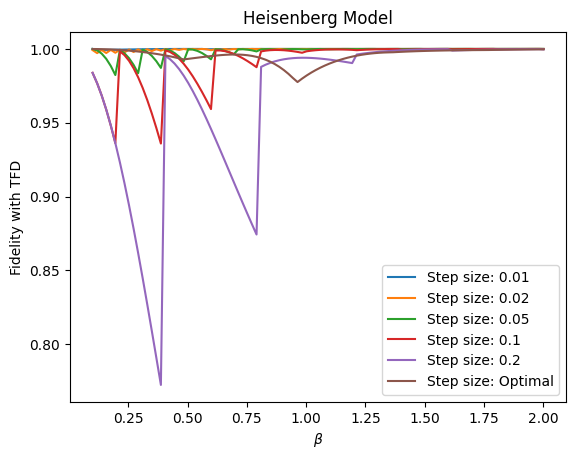

In [ ]:
beta = np.linspace(0.1, 2, 100)
nqubits = 3
H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
stepSize = np.array([0.01,0.02,0.05,0.1,0.2])
fidelityDBI = np.empty((len(beta),len(stepSize)+1))

for i in range(len(beta)):
    for j in range(len(stepSize)):
        fidelityDBI[i,j]  = thermalStatePrepComparison(beta[i], H, nqubits, "DBI", stepSize[j])
    fidelityDBI[i,-1], _ = thermalStatePrepOptimal(beta[i],H, nqubits, "DBI", "Energy")



plt.figure()
plt.title('Heisenberg Model')
for j in range(len(stepSize)):
    plt.plot(beta, fidelityDBI[:,j], label = 'Step size: '+str(stepSize[j]))
plt.plot(beta, fidelityDBI[:,-1], label = 'Step size: Optimal')
plt.xlabel(r'$\beta$')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()


[Qibo 0.2.16|WARNING|2025-02-24 13:27:14]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


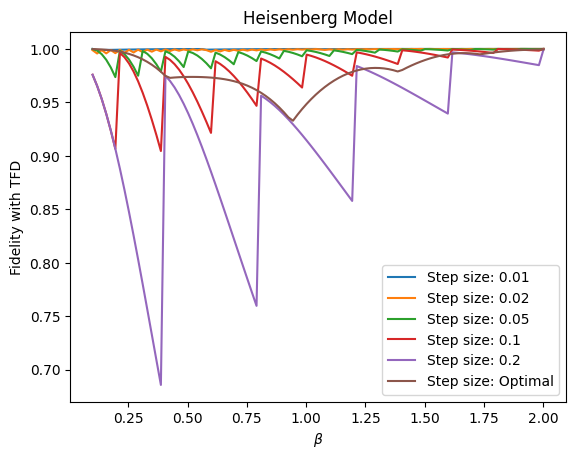

In [ ]:
beta = np.linspace(0.1, 2, 100)
nqubits = 4
H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
stepSize = np.array([0.01,0.02,0.05,0.1,0.2])
fidelityDBI = np.empty((len(beta),len(stepSize)+1))

for i in range(len(beta)):
    for j in range(len(stepSize)):
        fidelityDBI[i,j]  = thermalStatePrepComparison(beta[i], H, nqubits, "DBI", stepSize[j])
    fidelityDBI[i,-1], _ = thermalStatePrepOptimal(beta[i],H, nqubits, "DBI", "Energy")



plt.figure()
plt.title('Heisenberg Model')
for j in range(len(stepSize)):
    plt.plot(beta, fidelityDBI[:,j], label = 'Step size: '+str(stepSize[j]))
plt.plot(beta, fidelityDBI[:,-1], label = 'Step size: Optimal')
plt.xlabel(r'$\beta$')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()


[Qibo 0.2.16|INFO|2025-02-25 14:52:34]: Using numpy backend on /CPU:0
[Qibo 0.2.16|WARNING|2025-02-25 14:52:34]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
C:\Users\andre\AppData\Local\Temp\ipykernel_32412\1275666029.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity[i,j]  = thermalStatePrepBest(beta[i], H, nqubits, "DBI", K[j])


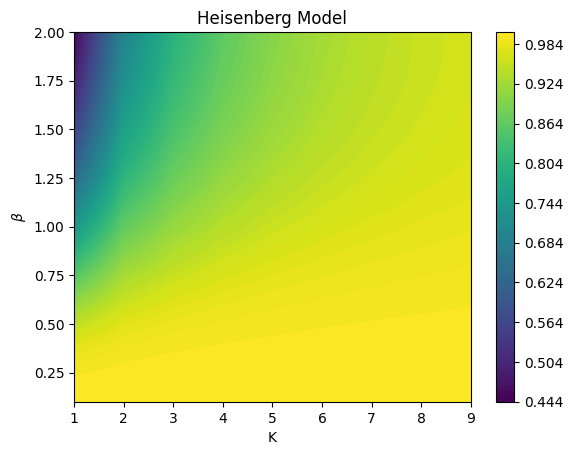

In [ ]:
beta = np.linspace(0.1, 2, 50)
K = np.arange(1, 10)
nqubits = 4
H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelity = np.empty((len(beta),len(K)))

for i in range(len(beta)):
    for j in range(len(K)):
        fidelity[i,j]  = thermalStatePrepBest(beta[i], H, nqubits, "DBI", K[j])


plt.figure()
plt.title('Heisenberg Model')
plt.contourf(K, beta, fidelity, levels=100)
plt.ylabel(r'$\beta$')
plt.xlabel('K')
plt.colorbar()



[Qibo 0.2.16|WARNING|2025-02-25 14:56:00]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
C:\Users\andre\AppData\Local\Temp\ipykernel_32412\390485867.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity[i,j]  = thermalStatePrepBest(beta[i], H, nqubits, "DBI", K[j])


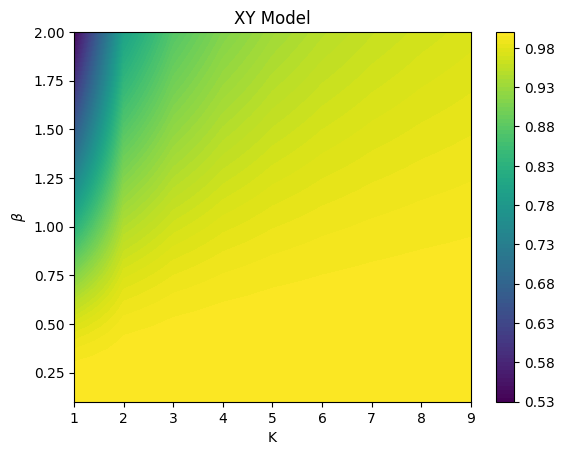

In [ ]:
beta = np.linspace(0.1, 2, 50)
K = np.arange(1, 10)
nqubits = 4
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelity = np.empty((len(beta),len(K)))

for i in range(len(beta)):
    for j in range(len(K)):
        fidelity[i,j]  = thermalStatePrepBest(beta[i], H, nqubits, "DBI", K[j])


plt.figure()
plt.title('XY Model')
plt.contourf(K, beta, fidelity, levels = 100)
plt.ylabel(r'$\beta$')
plt.xlabel('K')
plt.colorbar()



[Qibo 0.2.16|WARNING|2025-02-25 14:59:05]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
C:\Users\andre\AppData\Local\Temp\ipykernel_32412\298336242.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity[i,j]  = thermalStatePrepBest(beta[i], H, nqubits, "DBI", K[j])


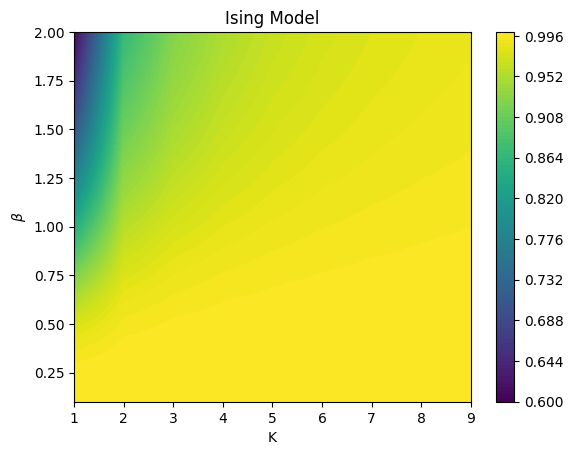

In [ ]:
beta = np.linspace(0.1, 2, 50)
K = np.arange(1, 10)
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
fidelity = np.empty((len(beta),len(K)))

for i in range(len(beta)):
    for j in range(len(K)):
        fidelity[i,j]  = thermalStatePrepBest(beta[i], H, nqubits, "DBI", K[j])

plt.figure()
plt.title('Ising Model')
plt.contourf(K, beta, fidelity, levels = 100)
plt.ylabel(r'$\beta$')
plt.xlabel('K')
plt.colorbar()




[Qibo 0.2.16|WARNING|2025-03-05 12:01:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


0.11111111111111112
[]
[]
[0.07070707]
[0.06565657]
[]


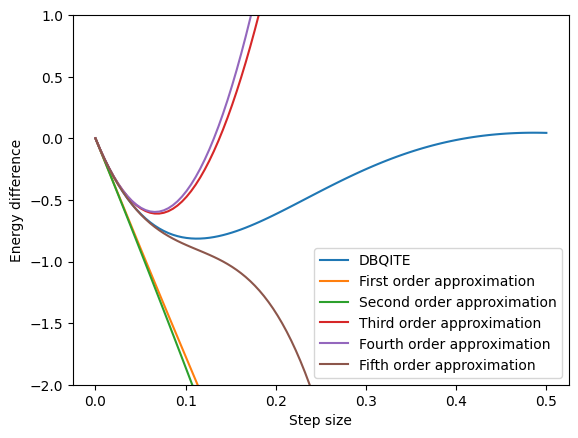

In [11]:
nqubits = 4
H_def = sum([X(x+1)*X(x)+Y(x+1)*Y(x)+Z(x+1)*Z(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
initState = maxEntangledState(nqubits)

s = np.linspace(0, 0.5, 100)
orders = np.arange(1, 4)
energyDiff = np.empty((len(s),len(orders)+1))
energyInit = initState.conj() @ H @ initState
for i in range(len(s)):
    dbqiteVal = DBQITE(1, H, s[i], initState)[-1]
    energyDiff[i,0] = np.real(dbqiteVal.conj() @ H @ dbqiteVal - energyInit)
    #for j in range(orders[0],orders[-1]+1):
        # energyDiff[i,j] = energyDiffApproximation2(np.sqrt(s[i]), H, initState, j)

firstOrder = np.empty(len(s))
secondOrder = np.empty(len(s))
thirdOrder = np.empty(len(s))
fourthOrder = np.empty(len(s))
fifthOrder = np.empty(len(s))

for i in range(len(s)):
    firstOrder[i] = -2*np.sin(np.sqrt(s[i]))*moment(H, initState, 2)*s[i]**(1/2)
    secondOrder[i] = -2*(1-np.cos(np.sqrt(s[i])))*(-1/2)*moment(H, initState, 3)*s[i]
    secondOrder[i] += firstOrder[i]
    thirdOrder[i] = -2*np.sin(np.sqrt(s[i]))*(-1/6)*(moment(H, initState, 4)+3*moment(H, initState, 2)**2)*s[i]**(3/2)
    thirdOrder[i] += secondOrder[i]
    fourthOrder[i] = -2*(1-np.cos(np.sqrt(s[i])))*(1/24)*(moment(H, initState, 5)+2*moment(H, initState, 2)*moment(H, initState, 3))*s[i]**2
    fourthOrder[i] += thirdOrder[i]
    fifthOrder[i] = -2*np.sin(np.sqrt(s[i]))*(1/120)*(moment(H, initState, 6)
                                                    +15*moment(H, initState, 2)*moment(H, initState, 4)-
                                                    10*moment(H, initState, 3)**2)*s[i]**(5/2)
    fifthOrder[i] += fourthOrder[i]


plt.figure()
plt.plot(s, energyDiff[:,0], label='DBQITE')
# for j in range(1,len(orders)+1):
#     plt.plot(s, energyDiff[:,j], label='Order '+str(orders[j-1]))

plt.plot(s, firstOrder, label='First order approximation')
plt.plot(s, secondOrder, label='Second order approximation')
plt.plot(s, thirdOrder, label='Third order approximation')
plt.plot(s, fourthOrder, label='Fourth order approximation')
plt.plot(s, fifthOrder, label='Fifth order approximation')
plt.xlabel('Step size')
plt.ylabel('Energy difference')
plt.ylim(-2.0,1.0)
plt.legend()

print(s[np.argmin(energyDiff[:,0])])
print(s[sp.signal.argrelmin(firstOrder)])
print(s[sp.signal.argrelmin(secondOrder)])
print(s[sp.signal.argrelmin(thirdOrder)])
print(s[sp.signal.argrelmin(fourthOrder)])
print(s[sp.signal.argrelmin(fifthOrder)])

In [1]:
nqubits = 4
H_def = sum([X(x+1)*X(x)+Y(x+1)*Y(x)+Z(x+1)*Z(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
initState = maxEntangledState(nqubits)

s = np.linspace(0, 0.5, 100)
orders = np.arange(1, 4)
energyDiff = np.empty((len(s),len(orders)+1))
energyInit = initState.conj() @ H @ initState
for i in range(len(s)):
    dbqiteVal = DBQITE(1, H, s[i], initState)[-1]
    energyDiff[i,0] = np.real(dbqiteVal.conj() @ H @ dbqiteVal - energyInit)
    #for j in range(orders[0],orders[-1]+1):
        # energyDiff[i,j] = energyDiffApproximation2(np.sqrt(s[i]), H, initState, j)

firstOrder = np.empty(len(s))
secondOrder = np.empty(len(s))
thirdOrder = np.empty(len(s))
fourthOrder = np.empty(len(s))
fifthOrder = np.empty(len(s))

for i in range(len(s)):
    firstOrder[i] = -2*np.sin(np.sqrt(s[i]))*moment(H, initState, 2)*s[i]**(1/2)
    secondOrder[i] = -2*(1-np.cos(np.sqrt(s[i])))*(-1/2)*moment(H, initState, 3)*s[i]
    secondOrder[i] += firstOrder[i]
    thirdOrder[i] = -2*np.sin(np.sqrt(s[i]))*(-1/6)*(moment(H, initState, 4)+3*moment(H, initState, 2)**2)*s[i]**(3/2)
    thirdOrder[i] += secondOrder[i]



plt.figure()
plt.plot(s, energyDiff[:,0], label='DBQITE')
# for j in range(1,len(orders)+1):
#     plt.plot(s, energyDiff[:,j], label='Order '+str(orders[j-1]))

plt.plot(s, firstOrder, label='First order approximation')
plt.plot(s, thirdOrder, label='Third order approximation')
V = moment(H, initState, 2)
Q = moment(H, initState, 4)
s_opt = (3*V/(Q+3*V**2))
print(s_opt)
plt.xlabel('Step size')
plt.ylabel('Energy difference')
plt.axvline(x=s_opt, color='r', linestyle='--', label='Optimal step size')
plt.ylim(-2.0,3.0)
plt.legend()

# print(s[np.argmin(energyDiff[:,0])])
# print(s[sp.signal.argrelmin(firstOrder)])
# print(s[sp.signal.argrelmin(secondOrder)])
# print(s[sp.signal.argrelmin(thirdOrder)])
# print(s[sp.signal.argrelmin(fourthOrder)])
# print(s[sp.signal.argrelmin(fifthOrder)])

NameError: name 'X' is not defined

In [18]:
V = moment(H, initState, 2)
Q = moment(H, initState, 4)
s_opt = (3*V/(Q-3*V**2))**2
print(s_opt)

0.16735537190082647


In [8]:
moment(H,initState,2)

9.0

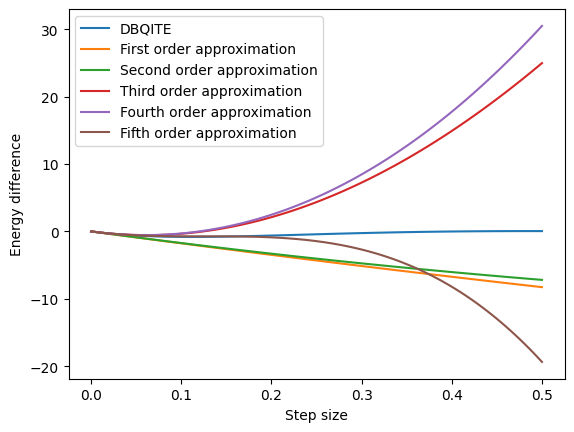

In [ ]:

plt.figure()
plt.plot(s, energyDiff[:,0], label='DBQITE')
plt.plot(s, firstOrder, label='First order approximation')
plt.plot(s, secondOrder, label='Second order approximation')
plt.plot(s, thirdOrder, label='Third order approximation')
plt.plot(s, fourthOrder, label='Fourth order approximation')
plt.plot(s, fifthOrder, label='Fifth order approximation')
plt.xlabel('Step size')
plt.ylabel('Energy difference')
plt.legend()

In [5]:
def gradientDescent(H, state, initStep = 0.0, lr = 0.1, iters = 10):
    delta = 1e-6
    step = initStep
    for _ in range(iters):
        statePlus = DBQITE(1, H, step+delta, state)[-1]
        stateMinus = DBQITE(1, H, step-delta, state)[-1]
        EPlus = np.real(statePlus.conj() @ H @ statePlus)
        EMinus = np.real(stateMinus.conj() @ H @ stateMinus)
        derivative = (EPlus - EMinus)/(2*delta)
        step = step - lr*derivative
    return step


def newtonMethod(H, state, initStep=0.0, iters=100, tol=1e-6):
    delta = 1e-6
    step = initStep
    for _ in range(iters):
        state_new = DBQITE(1, H, step, state)[-1]
        statePlus = DBQITE(1, H, step + delta, state)[-1]
        stateMinus = DBQITE(1, H, step - delta, state)[-1]
        
        # Compute energy expectation values
        E = np.real(state_new.conj() @ H @ state_new)
        EPlus = np.real(statePlus.conj() @ H @ statePlus)
        EMinus = np.real(stateMinus.conj() @ H @ stateMinus)
        
        # Compute first and second derivatives
        derivative = (EPlus - EMinus) / (2 * delta)
        secondDerivative = (EPlus - 2 * E + EMinus) / (delta ** 2)
        
        # Check if second derivative is too small
        if abs(secondDerivative) < 1e-10:
            print("Warning: Second derivative is too small, stopping early.")
            break
        
        # Newton step update
        step -= derivative / secondDerivative
        
        # Check for convergence
        if abs(derivative) < tol:
            print("Converged")
            break

    return step


[Qibo 0.2.16|WARNING|2025-03-12 11:59:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


29.258517034068138
0.1474590433870091
0.14555010688774772


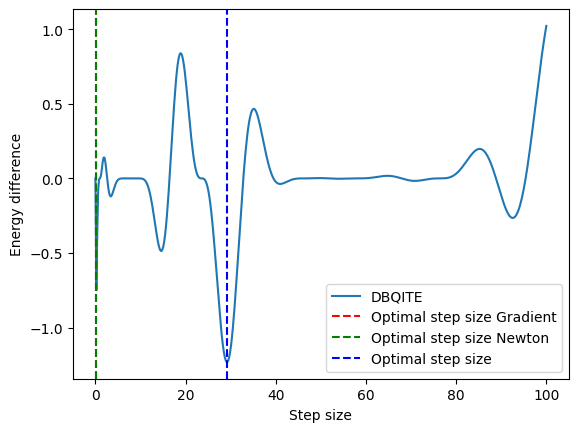

In [9]:
nqubits = 4
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
initState = maxEntangledState(nqubits)

s = np.linspace(0, 100, 500)
energyDiff = np.empty((len(s)))
energyInit = initState.conj() @ H @ initState
for i in range(len(s)):
    dbqiteVal = DBQITE(1, H, s[i], initState)[-1]
    energyDiff[i] = np.real(dbqiteVal.conj() @ H @ dbqiteVal - energyInit)
print(s[np.argmin(energyDiff)])
optStep = gradientDescent(H, initState, 0.001, 0.01, 3)
optStepNewton = newtonMethod(H, initState, 0.001, 2)
print(optStep)
print(optStepNewton)
plt.figure()
plt.plot(s, energyDiff, label='DBQITE')
plt.axvline(x=optStep, color='r', linestyle='--', label='Optimal step size Gradient')
plt.axvline(x=optStepNewton, color='g', linestyle='--', label='Optimal step size Newton')
plt.axvline(x=s[np.argmin(energyDiff)], color='b', linestyle='--', label='Optimal step size')
plt.xlabel('Step size')
plt.ylabel('Energy difference')
plt.legend()
